In [1]:
import copy
import os

import matplotlib.pyplot as plt
import numpy as np
import scipy
from tqdm import tqdm

from complex_network.materials.dielectric import Dielectric
from complex_network.networks import network_factory, pole_calculator
from complex_network.networks.network_perturbator import NetworkPerturbator
from complex_network.networks.network_spec import NetworkSpec

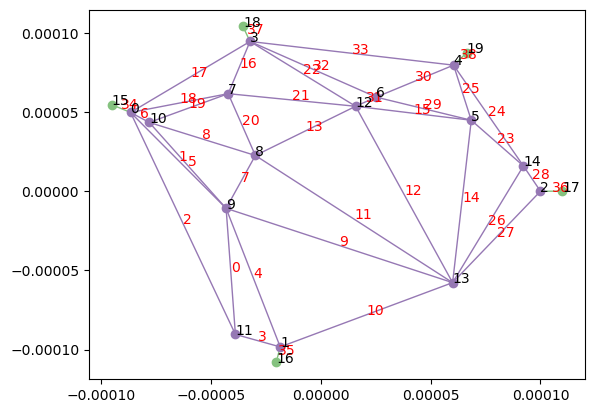

In [2]:
# Generate the random network
np.random.seed(1)
spec = NetworkSpec(
    network_type="delaunay",
    network_shape="circular",
    num_seed_nodes=0,
    external_offset=0.0,
    num_internal_nodes=15,
    num_external_nodes=5,
    network_size=100e-6,
    external_size=110e-6,
    node_S_mat_type="COE",
    node_S_mat_params={},
)
network = network_factory.generate_network(spec)
network.draw(show_indices=True)

In [3]:
# Broad sweep to find some of the poles
Dlam = 2.5e-10
lam_centre = 550e-9
lam_min = lam_centre - Dlam
lam_max = lam_centre + Dlam

max_imag = -1000j
k0_min = 2 * np.pi / lam_max + max_imag
k0_max = 2 * np.pi / lam_min + 0j
num_points = 1 * 10**2


x, y, data = pole_calculator.sweep(k0_min, k0_max, num_points, network)

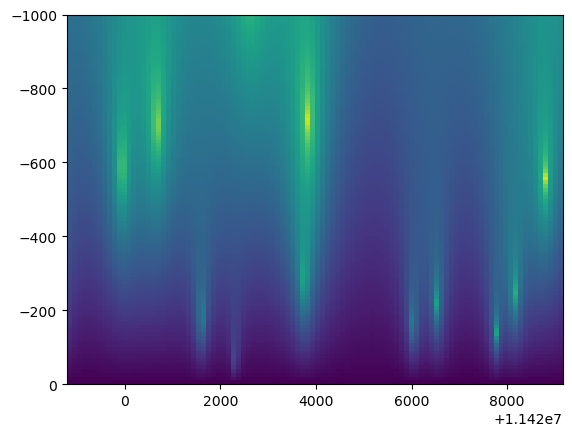

In [4]:
# Plot the initial pole landscape
fig, ax = plt.subplots()
im = ax.imshow(
    -np.log(data),
    extent=(k0_min.real, k0_max.real, 0.0, max_imag.imag),
    aspect="auto",
    vmin=0,
    vmax=7,
)

In [5]:
# Get positions of poles
# NOTE: the guesses were worked out by eye from looking at the figure
# If you change Dlam or lam_centre, this needs to be modified
pole_guesses = 1.142e7 + np.array(
    [
        0 - 600j,
        500 - 700j,
        3800 - 700j,
        9000 - 600j,
        1750 - 175j,
        2200 - 50j,
        3800 - 275j,
        6000 - 150j,
        6500 - 225j,
        7800 - 125j,
        8200 - 250j,
    ]
)
poles = np.array(
    [pole_calculator.find_pole(network, guess) for guess in pole_guesses]
)

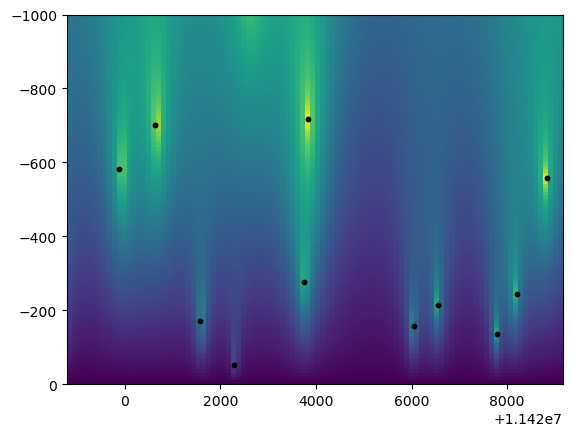

In [6]:
# Plot the initial pole landscape
plot_data = np.flip(data, axis=1)

fig, ax = plt.subplots()
im = ax.imshow(
    -np.log(data),
    extent=(k0_min.real, k0_max.real, 0.0, max_imag.imag),
    aspect="auto",
)
ax.scatter(np.real(poles), np.imag(poles), color="black", s=10)

In [19]:
# Uniform network pumping starts here
perturbator = NetworkPerturbator(network)

Dn_values = np.linspace(0, -1e-3j, 50)

poles_dict, pole_shifts_dict = perturbator.track_pole_uniform_pump(
    poles, Dn_values
)

100%|██████████| 49/49 [14:24<00:00, 17.65s/it]


Text(0.5, 1.0, 'Uniform pump')

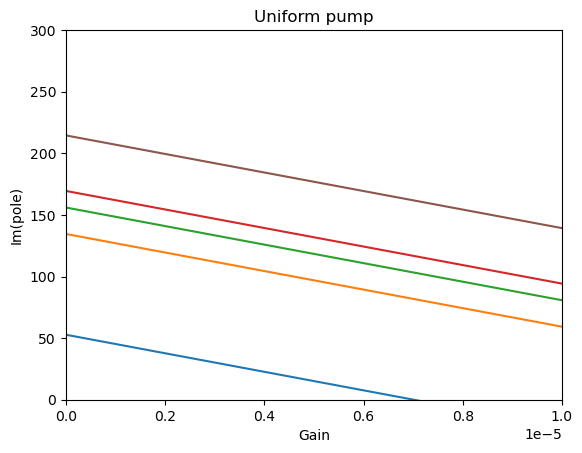

In [23]:
fig, ax = plt.subplots()
for i, p in enumerate(poles_dict["direct"]):
    if i == 5:
        color = "tab:blue"
    elif i == 9:
        color = "tab:orange"
    elif i == 7:
        color = "tab:green"
    elif i == 4:
        color = "tab:red"
    elif i == 8:
        color = "tab:brown"
    else:
        continue
    ax.plot(-np.imag(Dn_values), -np.imag(p), color=color)
ax.set_ylim(0, 300)
ax.set_xlim(0, 1e-5)
ax.set_xlabel("Gain")
ax.set_ylabel("Im(pole)")
ax.set_title("Uniform pump")

In [9]:
# Uniform network pumping starts here
perturbator = NetworkPerturbator(network)

target_pole_index = 9
target_pole = poles[target_pole_index]
Dn = Dn_values[1]
Q_dict = perturbator.get_Q_pump_links(target_pole)
pump_profile = {key: np.imag(val) for key, val in Q_dict.items()}

# Selective network pumping starts here
link_index = np.argmax(list(pump_profile.values()))
poles_dict, pole_shifts_dict = perturbator.track_pole_selective_pump(
    link_index, poles, Dn_values
)

100%|██████████| 49/49 [01:22<00:00,  1.68s/it]


Text(0.5, 1.0, 'Pump index 33 (orange)')

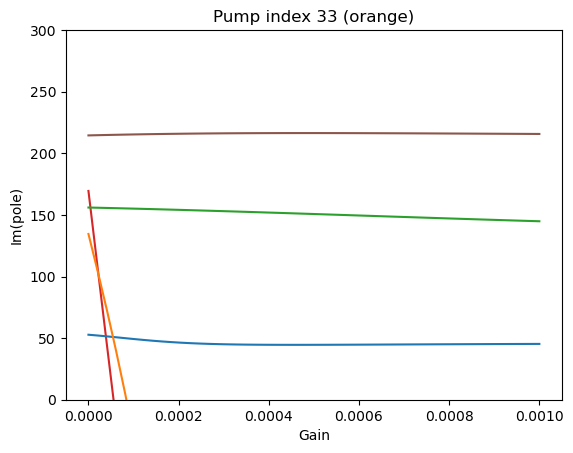

In [12]:
fig, ax = plt.subplots()
for i, p in enumerate(poles_dict["direct"]):
    if i == 5:
        color = "tab:blue"
    elif i == 9:
        color = "tab:orange"
    elif i == 7:
        color = "tab:green"
    elif i == 4:
        color = "tab:red"
    elif i == 8:
        color = "tab:brown"
    else:
        continue
    ax.plot(-np.imag(Dn_values), -np.imag(p), color=color)
ax.set_ylim(0, 300)
ax.set_xlabel("Gain")
ax.set_ylabel("Im(pole)")
ax.set_title(f"Pump index {link_index} (orange)")

In [13]:
# Uniform network pumping starts here
perturbator = NetworkPerturbator(network)

target_pole_index = 7
target_pole = poles[target_pole_index]
Dn = Dn_values[1]
Q_dict = perturbator.get_Q_pump_links(target_pole)
pump_profile = {key: np.imag(val) for key, val in Q_dict.items()}

# Selective network pumping starts here
link_index = np.argmax(list(pump_profile.values()))
poles_dict, pole_shifts_dict = perturbator.track_pole_selective_pump(
    link_index, poles, Dn_values
)

100%|██████████| 49/49 [01:30<00:00,  1.85s/it]


Text(0.5, 1.0, 'Pump index 14 (green)')

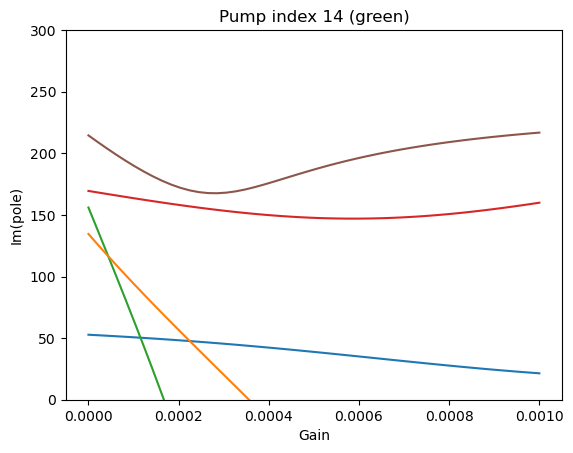

In [14]:
fig, ax = plt.subplots()
for i, p in enumerate(poles_dict["direct"]):
    if i == 5:
        color = "tab:blue"
    elif i == 9:
        color = "tab:orange"
    elif i == 7:
        color = "tab:green"
    elif i == 4:
        color = "tab:red"
    elif i == 8:
        color = "tab:brown"
    else:
        continue
    ax.plot(-np.imag(Dn_values), -np.imag(p), color=color)
ax.set_ylim(0, 300)
ax.set_xlabel("Gain")
ax.set_ylabel("Im(pole)")
ax.set_title(f"Pump index {link_index} (green)")

In [15]:
# Uniform network pumping starts here
perturbator = NetworkPerturbator(network)

target_pole_index = 4
target_pole = poles[target_pole_index]
Dn = Dn_values[1]
Q_dict = perturbator.get_Q_pump_links(target_pole)
pump_profile = {key: np.imag(val) for key, val in Q_dict.items()}

# Selective network pumping starts here
link_index = np.argmax(list(pump_profile.values()))
poles_dict, pole_shifts_dict = perturbator.track_pole_selective_pump(
    link_index, poles, Dn_values
)

100%|██████████| 49/49 [01:22<00:00,  1.68s/it]


Text(0.5, 1.0, 'Pump index 33 (red)')

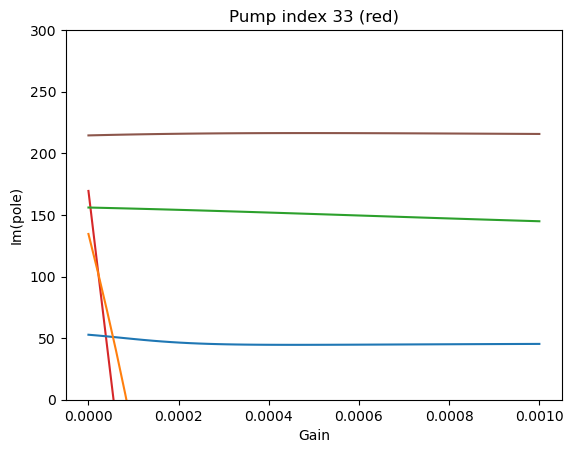

In [16]:
fig, ax = plt.subplots()
for i, p in enumerate(poles_dict["direct"]):
    if i == 5:
        color = "tab:blue"
    elif i == 9:
        color = "tab:orange"
    elif i == 7:
        color = "tab:green"
    elif i == 4:
        color = "tab:red"
    elif i == 8:
        color = "tab:brown"
    else:
        continue
    ax.plot(-np.imag(Dn_values), -np.imag(p), color=color)
ax.set_ylim(0, 300)
ax.set_xlabel("Gain")
ax.set_ylabel("Im(pole)")
ax.set_title(f"Pump index {link_index} (red)")

In [17]:
# Uniform network pumping starts here
perturbator = NetworkPerturbator(network)

target_pole_index = 8
target_pole = poles[target_pole_index]
Dn = Dn_values[1]
Q_dict = perturbator.get_Q_pump_links(target_pole)
pump_profile = {key: np.imag(val) for key, val in Q_dict.items()}

# Selective network pumping starts here
link_index = np.argmax(list(pump_profile.values()))
poles_dict, pole_shifts_dict = perturbator.track_pole_selective_pump(
    link_index, poles, Dn_values
)

100%|██████████| 49/49 [01:21<00:00,  1.66s/it]


Text(0.5, 1.0, 'Pump index 5 (brown)')

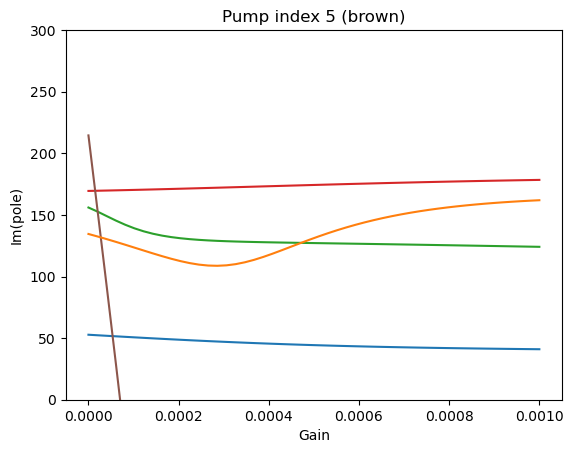

In [18]:
fig, ax = plt.subplots()
for i, p in enumerate(poles_dict["direct"]):
    if i == 5:
        color = "tab:blue"
    elif i == 9:
        color = "tab:orange"
    elif i == 7:
        color = "tab:green"
    elif i == 4:
        color = "tab:red"
    elif i == 8:
        color = "tab:brown"
    else:
        continue
    ax.plot(-np.imag(Dn_values), -np.imag(p), color=color)
ax.set_ylim(0, 300)
ax.set_xlabel("Gain")
ax.set_ylabel("Im(pole)")
ax.set_title(f"Pump index {link_index} (brown)")

In [24]:
# Uniform network pumping starts here
perturbator = NetworkPerturbator(network)

target_pole_index = 9
target_pole = poles[target_pole_index]
Dn = Dn_values[1]
poles_dict, pole_shifts_dict = perturbator.track_pole_custom_pump(target_pole, poles, Dn_values)

100%|██████████| 49/49 [02:46<00:00,  3.39s/it]


Text(0.5, 1.0, 'Custom pump for orange')

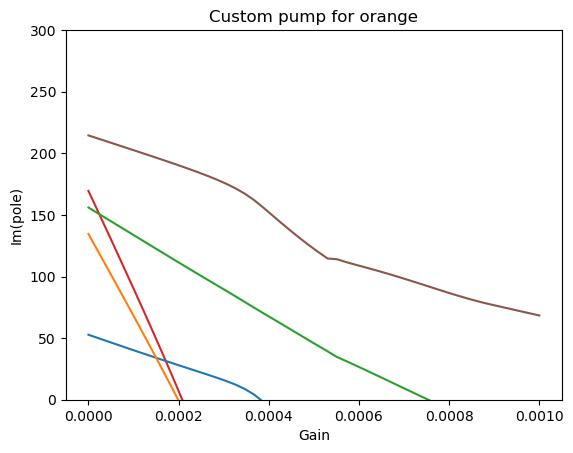

In [25]:
fig, ax = plt.subplots()
for i, p in enumerate(poles_dict["direct"]):
    if i == 5:
        color = "tab:blue"
    elif i == 9:
        color = "tab:orange"
    elif i == 7:
        color = "tab:green"
    elif i == 4:
        color = "tab:red"
    elif i == 8:
        color = "tab:brown"
    else:
        continue
    ax.plot(-np.imag(Dn_values), -np.imag(p), color=color)
ax.set_ylim(0, 300)
ax.set_xlabel("Gain")
ax.set_ylabel("Im(pole)")
ax.set_title(f"Custom pump for orange")